Final m/w0 value:  4.06267983717
Final b/w1 value:  3.79549738172
Therefore, w=[ 4.06267983717 , 3.79549738172 ] 

Training MSE:  5.84551331137e-13
Validation MSE:  2.85012327771e-12


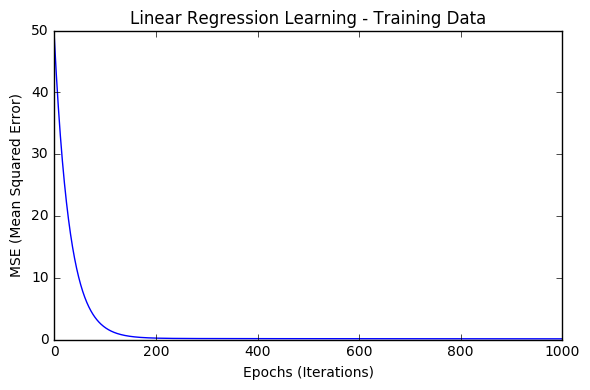

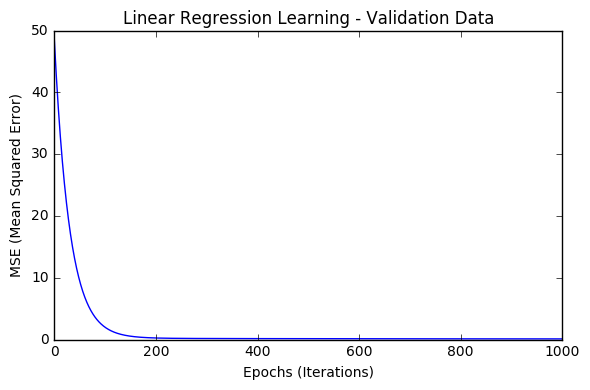

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read and sort data from DataSets
trainData = pd.read_csv("data/Dataset_2_train.csv", header=None)
validData = pd.read_csv("data/Dataset_2_valid.csv", header=None)
testData = pd.read_csv("data/Dataset_2_test.csv", header=None)

# Data columns to arrays
def makeArrays(data):
    for row in data:
        x, y = [], []
        x.extend(data[0])
        y.extend(data[1])
    return x, y

# Optimize m/w0 and b/w1
def optimizeW(dataX, dataY, y):
    m_val = 0
    b_val = 0
    N = len(dataX)
    
    for i in range(1, len(dataX)):
        m_val += y(dataX[i]) - dataY[i]
        b_val += (y(dataX[i]) - dataY[i])*dataX[i]
    
    return m_val/N, b_val/N

def getMSE(m, b, x, y, bestMSE):
    MSE = 0
    for i in range(len(x)):
        outputPredict = (m*x[i]) + b
        outputReal = y[i]
        tempMSE = np.power(outputPredict - outputReal, 2)
        if (tempMSE < bestMSE):
            bestMSE = tempMSE
        MSE += tempMSE
    return MSE/len(x), bestMSE
    
def linearRegression(epochs):
    # y = m*x + b, where m=w0, b=w1
    m = 0
    b = 0
    y = lambda x: (m*x) + b
    
    learnRate = 0.01
    epochVals, trainMSE, validMSE, updatedVars = [], [], [], []
    trainMSEOptimal = 99999
    validMSEOptimal = 99999
    
    for i in range(epochs):
        opt1, opt2 = optimizeW(trainX, trainY, y)
        # Update m/w0 and b/w1 values
        m -= learnRate*opt2
        b -= learnRate*opt1
        # Update arrays
        epochVals.append(i)
        MSE_t, trainMSEOptimal = getMSE(m, b, trainX, trainY, trainMSEOptimal)
        MSE_v, validMSEOptimal = getMSE(m, b, validX, validY, validMSEOptimal)
        trainMSE.append(MSE_t)
        validMSE.append(MSE_v)
        updatedVars.append([m, b])
    return m, b, y, epochVals, trainMSE, validMSE, updatedVars, trainMSEOptimal, validMSEOptimal
    

# Separate X and Y values of each dataset
trainX, trainY = makeArrays(trainData)
validX, validY = makeArrays(validData)
testX, testY = makeArrays(testData)


###1(a) Use the step size of 1e-6. Compute the MSE on validation set for every epoch.###

w0, w1, y, epochVals, trainMSE, validMSE, updatedVars, trainMSEOptimal, validMSEOptimal = linearRegression(1000)
print("Final m/w0 value: ", w0)
print("Final b/w1 value: ", w1)
print("Therefore, w=[", w0, ",", w1, "]", "\n")
print("Training MSE: ", trainMSEOptimal)
print("Validation MSE: ", validMSEOptimal)


###1(b) Plot the learning curve i.e. training and validation MSE for every epoch. [Note: Plot the learning curve until the learning saturates.]###

plt.title("Linear Regression Learning - Training Data")
plt.xlabel("Epochs (Iterations)")
plt.ylabel("MSE (Mean Squared Error)")
plt.plot(epochVals, trainMSE)
plt.tight_layout()
plt.show()
plt.title("Linear Regression Learning - Validation Data")
plt.xlabel("Epochs (Iterations)")
plt.ylabel("MSE (Mean Squared Error)")
plt.plot(epochVals, validMSE)
plt.tight_layout()
plt.show()

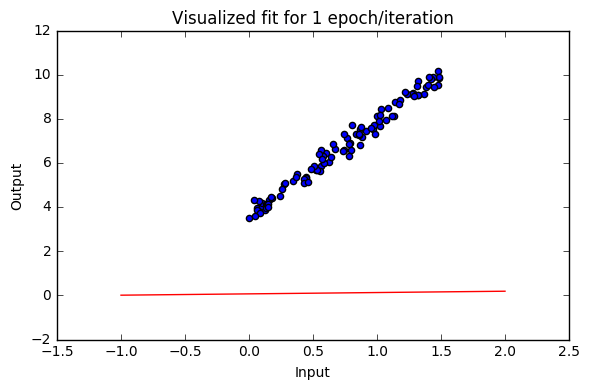

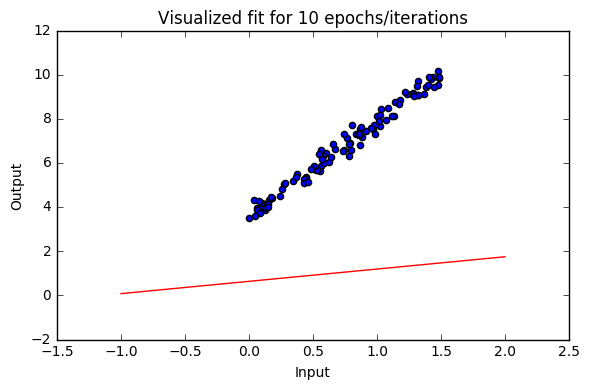

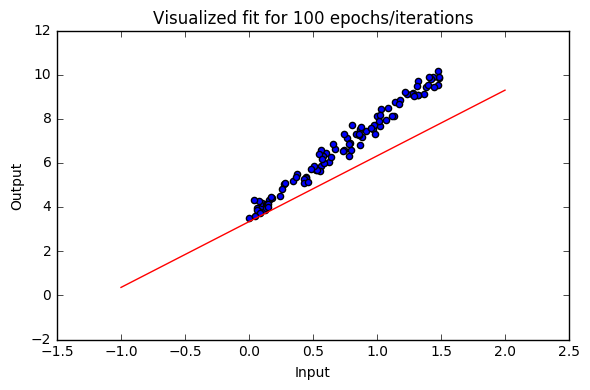

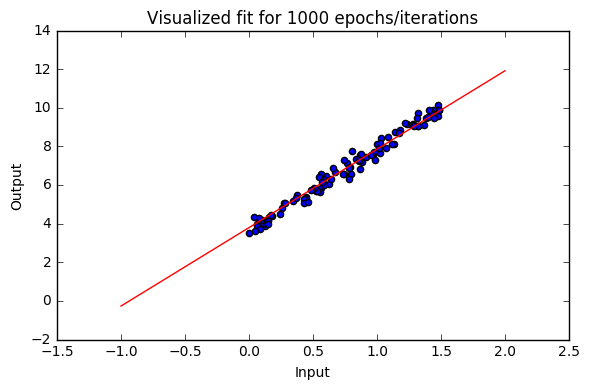

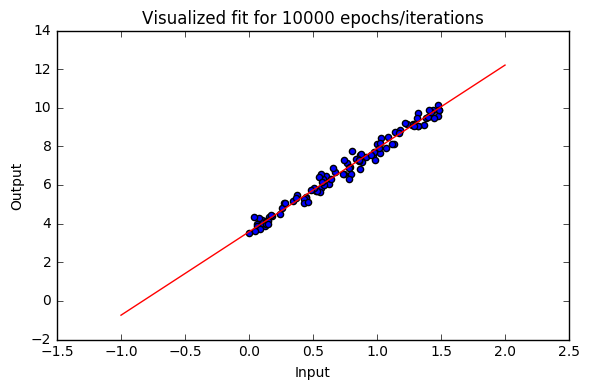

In [5]:
###3 Visualize the fit for every epoch and report 5 visualizations chosen at random to illustrate how the regression fit evolves during the training process.###

def plotLine(y, dataPoints):
    minX = min(dataPoints)
    maxX = max(dataPoints)
    # Range of x is extended to better represent linear regression
    x_range = [i for i in range(int(minX)-1, int(maxX)+2)]
    y_range = [y(x) for x in x_range]
    plt.plot(x_range, y_range, 'r')

def plotAll(y, dataX, dataY, title):
    plotLine(y, dataX)
    plt.title(title)
    plt.xlabel("Input")
    plt.ylabel("Output")
    plt.scatter(dataX, dataY)
    plt.tight_layout()
    plt.show()
    

w0_1, w1_1, y_1, epochVals_1, trainMSE_1, validMSE_1, updatedVars_1, trainMSEOptimal_1, validMSEOptimal_1 = linearRegression(1)
w0_2, w1_2, y_2, epochVals_2, trainMSE_2, validMSE_2, updatedVars_2, trainMSEOptimal_2, validMSEOptimal_2 = linearRegression(10)
w0_3, w1_3, y_3, epochVals_3, trainMSE_3, validMSE_3, updatedVars_3, trainMSEOptimal_3, validMSEOptimal_3 = linearRegression(100)
w0_4, w1_4, y_4, epochVals_4, trainMSE_4, validMSE_4, updatedVars_4, trainMSEOptimal_4, validMSEOptimal_4 = linearRegression(1000)
w0_5, w1_5, y_5, epochVals_5, trainMSE_5, validMSE_5, updatedVars_5, trainMSEOptimal_5, validMSEOptimal_5 = linearRegression(10000)

plotAll(y_1, testX, testY, "Visualized fit for 1 epoch/iteration")
plotAll(y_2, testX, testY, "Visualized fit for 10 epochs/iterations")
plotAll(y_3, testX, testY, "Visualized fit for 100 epochs/iterations")
plotAll(y_4, testX, testY, "Visualized fit for 1000 epochs/iterations")
plotAll(y_5, testX, testY, "Visualized fit for 10000 epochs/iterations")